<a href="https://colab.research.google.com/github/HopeProject1/Masters_Project/blob/master/Source_Finding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install corner

  Stored in directory: /root/.cache/pip/wheels/70/d8/e5/e0e7974a2a5757483ea5a180c937041cf6872dc9993d78234a
Successfully built corner


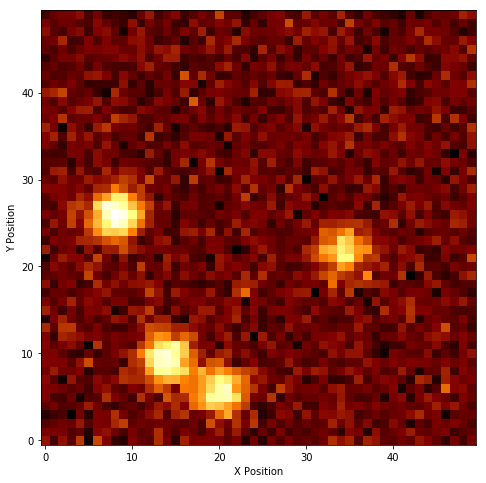

Begin Drawing Live points from prior...
No. live points :  700


  0% (2 of 60000) |                      | Elapsed Time: 0:00:00 ETA:   0:55:07

End Draw!
Begin nested sampling...
No. of runs :  60000
No. of parameters :  12


 99% (59999 of 60000) |################# | Elapsed Time: 0:47:57 ETA:   0:00:00


logZ = -1316.8685390728274 
Information = 6218 nats

End nested sampling.


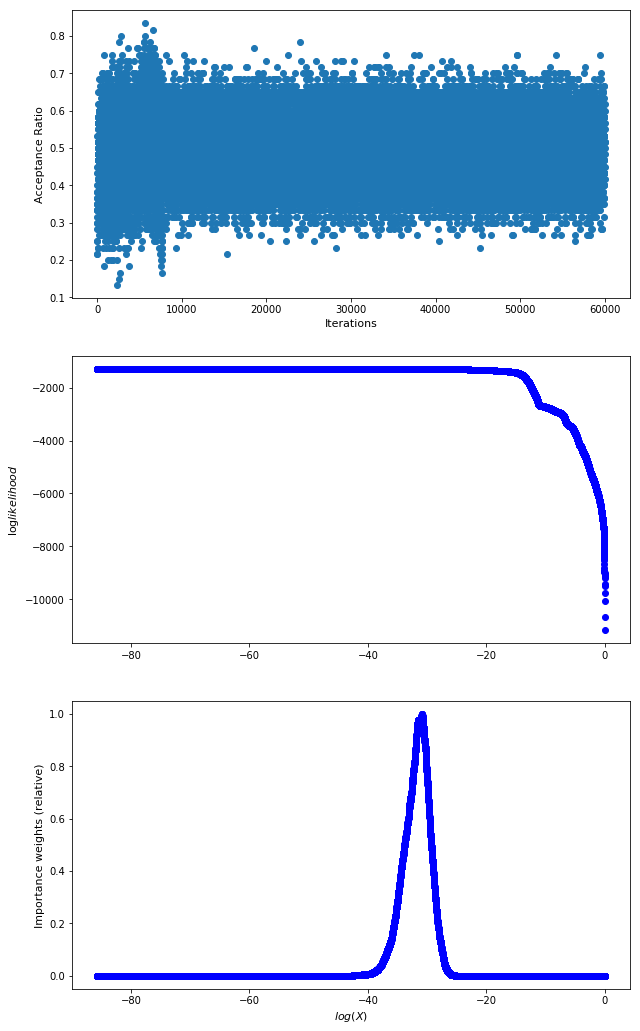

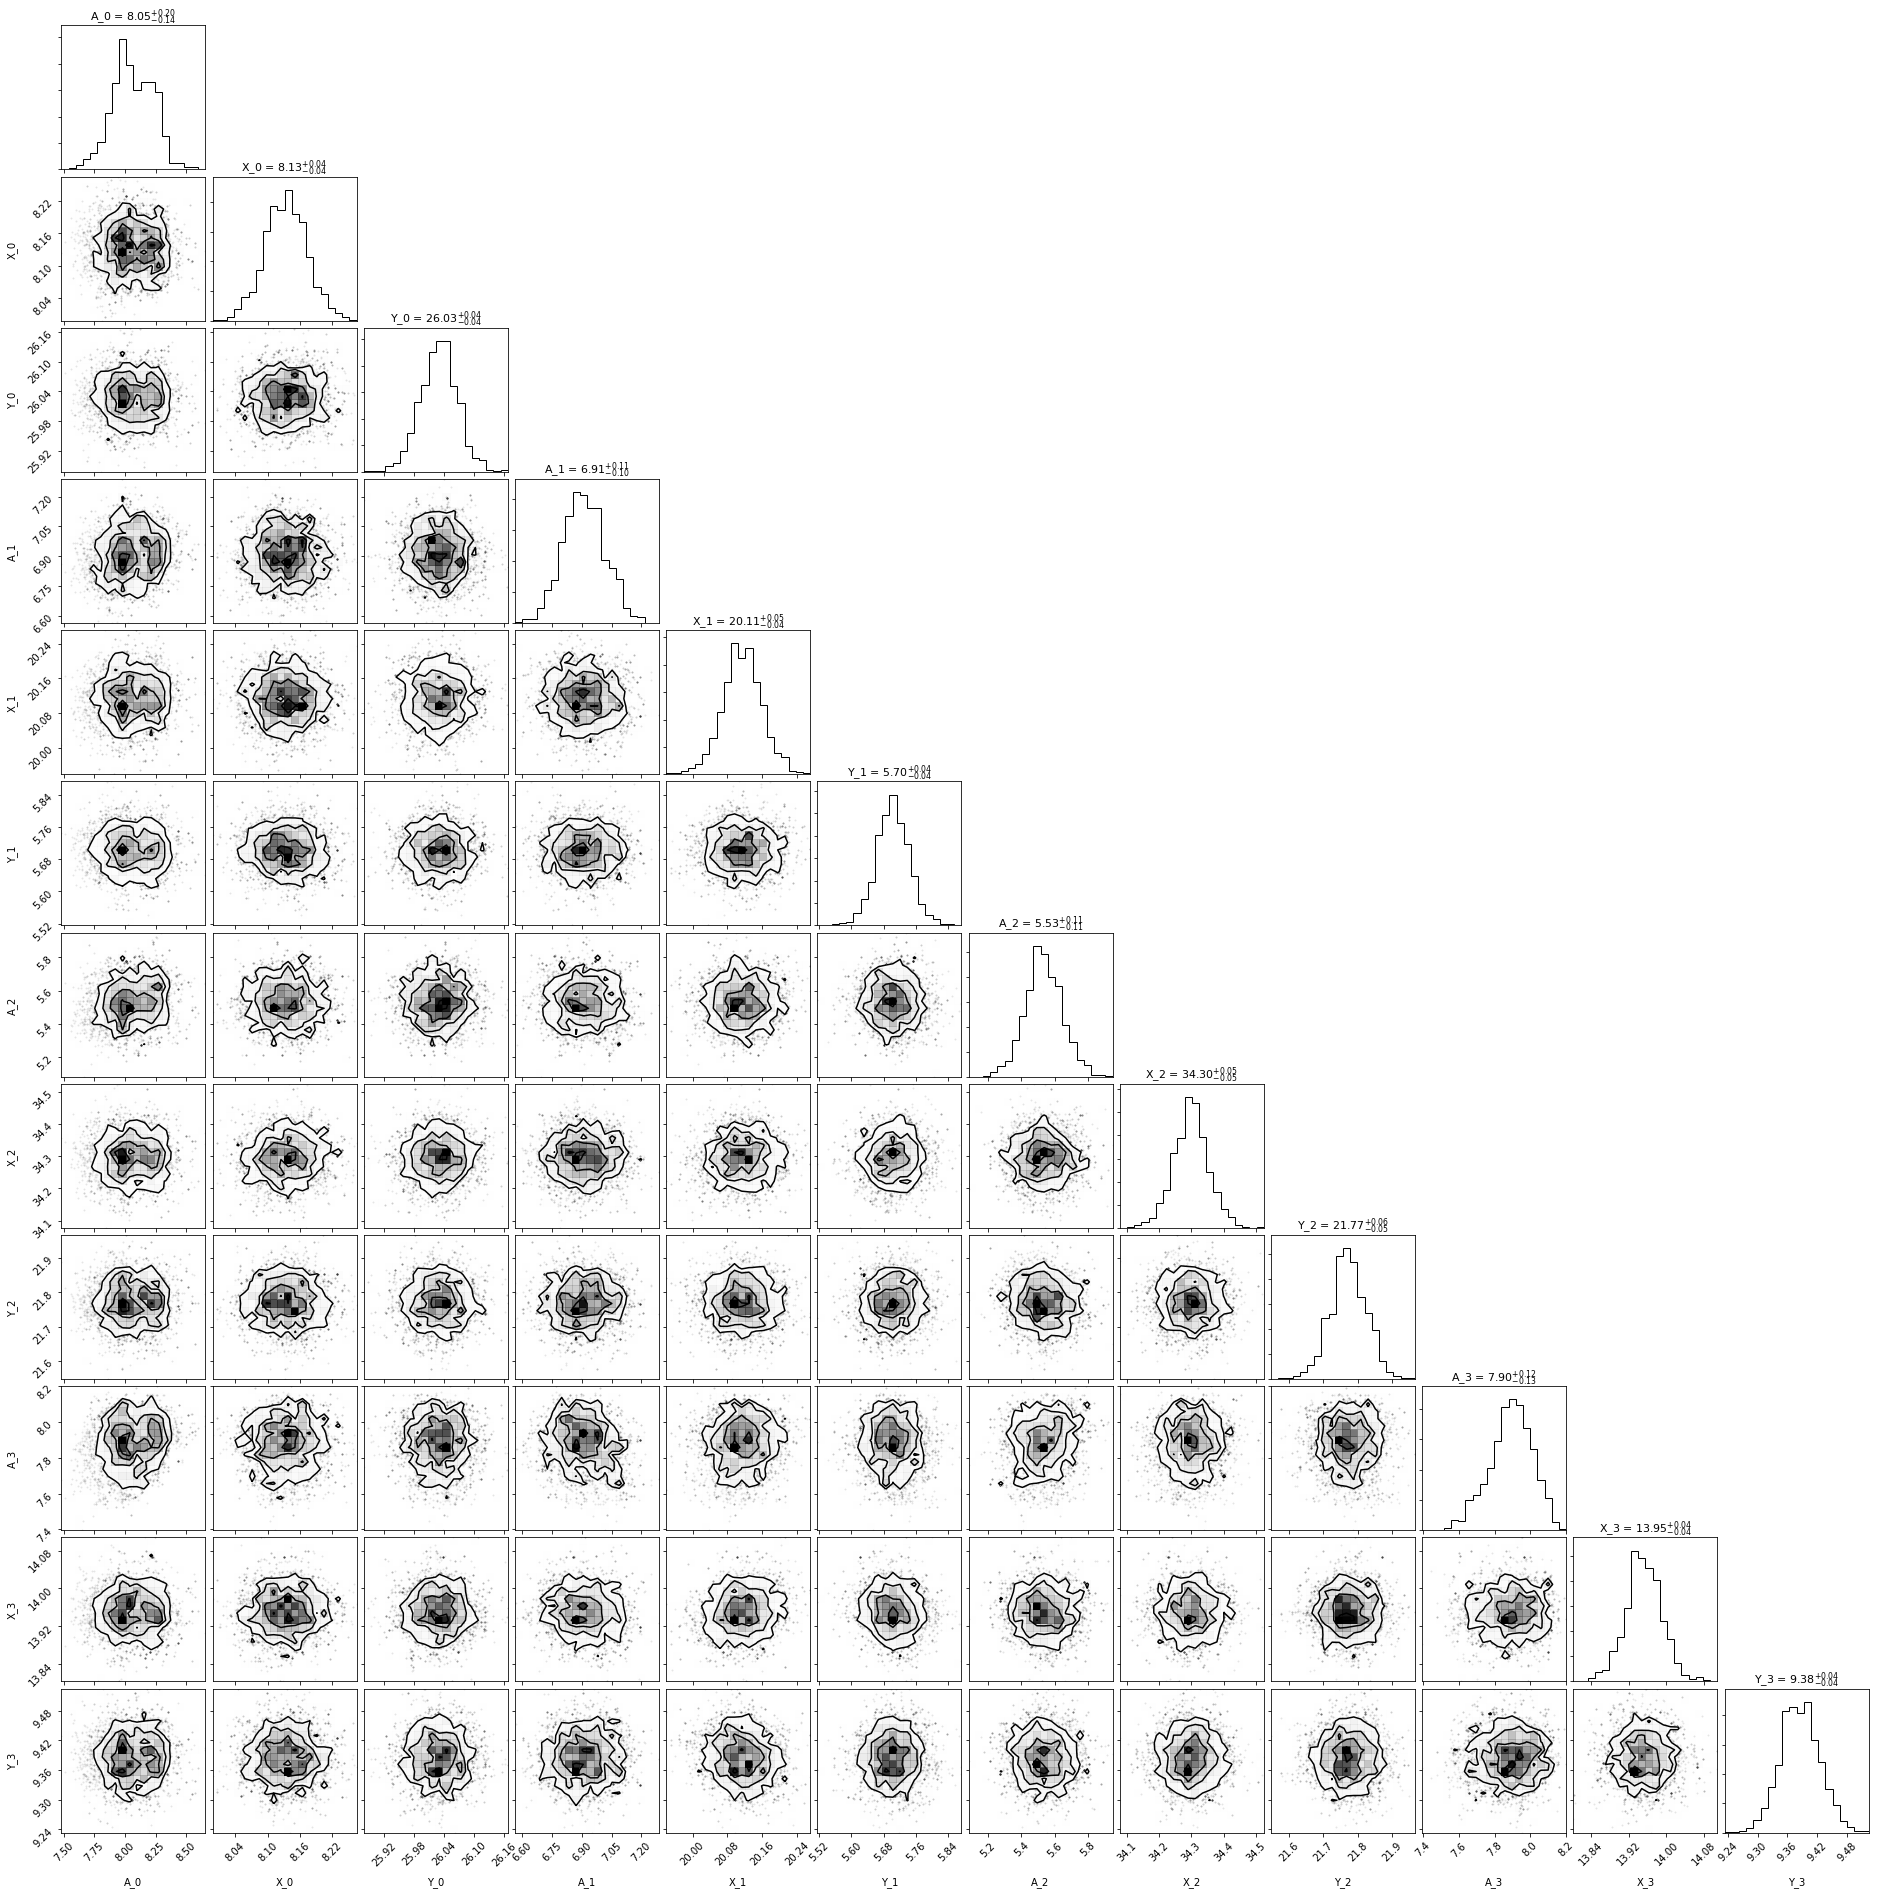

In [0]:
import numpy as np
import copy as duplicate
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import Nested_Sampling_3 as NS3
import Metropolis_Hasting_3_0T as MH3

import Nest_iterator_functions as nsf

import pandas as pd




pixel_size = 50             #npix by npix image
n_walkers = 4
noise_level = 0.7          #sigma noise level
num_of_model_sources = 	4  #number of model sources
ndim = 		3                 #number of dimensions

nlive_points = 700
nest_steps =  60000

mcmc_steps = 60

########################################################################################################

def logLikelihood(thetas):

    """Simple gaussian Likelihood

    Parameters
    --------------
    thetas : array
            parameter values [a,b,c,d]

    *args : list
            Likelihood extra arguments

    --------------
    output: scalar
            loglikelihood value
    """

    mu_data , sigma = args2

    Model_simu   = nsf.WALKERS(n_walkers,pixel_size,thetas)
    Model_simu.walkers()
    
    mu_model = Model_simu.source_model

    loglikelihood_value = np.sum(-0.5*np.log(2*np.pi*(sigma**2))) - np.sum(((mu_data-mu_model)**2)/(2*sigma**2))

    return loglikelihood_value


def Prior(thetas):
    """Evaluate the prior probability of mu

    Parameters

    ----------------

    thetas : array
            parameter values [a,b,c,d]

    limits: list or array
            The limits of [a,b,c,d]

    *args : list
            prior extra arguments

    ----------------
     output: scalar
            The Prior of parameters [a,b,c,d].
    """

    # ordered (alimits, blimits , climits , dlimits = limits)

    # this is how they are ordered (a, b, c ,d = theta)

    #If position is out of limits discard
    limits = param_limit
    
    for m in range(len(thetas)):
        theta = thetas[m]
        for i in range(len(theta)):

            if (theta[i] < limits[i][0]) or (theta[i] > limits[i][1]):
                return -np.inf

    return 1.0

#############################################################################
# Set fixed pameters. A ,X ,Y ,R 
def make_source():
        np.random.seed(25)
        source_list = []

        A_list = []
        X_list = []
        Y_list = []
      

        for i in range(num_of_model_sources):

                u = np.random.random()
                A_true =  5*np.random.random_sample() + 5
                X_true = pixel_size*np.random.random()
                Y_true = pixel_size*np.random.random()
                
        
                source_list.append([A_true,X_true,Y_true])
                A_list.append(A_true)
                X_list.append(X_true)
                Y_list.append(Y_true)
                

        params = np.array(source_list)

        sources = pd.DataFrame(columns=['A_true','X_true','Y_true'])
        sources['A_true'] = A_list
        sources['X_true'] = X_list
        sources['Y_true'] = Y_list


        sources.to_csv('True_sources_5.csv')

        return params , sources

params , sources = make_source()



#n_walkers = 3

#Generate some noise with sigma.

Noise = np.random.normal(0,noise_level,(pixel_size,pixel_size))

# Generate simulation with one source

Simulation = nsf.WALKERS(num_of_model_sources,pixel_size,params)
Simulation.walkers()

# Add noise to the Simulated data.
Model = Simulation.source_model + Noise


fig, (ax) = plt.subplots(figsize=(10,8),nrows=1)

ax.imshow(Model,origin='lower',cmap='afmhot')
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
plt.savefig('Simulated_Image_5.png')
plt.show()

np.savetxt('Model_dataset.csv',Model)
###################################################################


#Parameter limits
param_limits = [[5,10],[0,50],[0,50]]   #just fix R
param_limit = np.array(param_limits)    

# mcmc stepsize
param_step =  [.5,1.5,1.5]   #[.5,.5,.53,.28]
stepsize = np.array(param_step) 

#Number of parameters
#ndim = 4

args2  = Model , noise_level


labels = ['A','X','Y']

#Instiantiate the Explorer
explore = nsf.EXPLORER(logLikelihood, Prior ,stepsize,mcmc_steps)

Image_sources = NS3.Nested_Sampling(logLikelihood, Prior, ndim, n_walkers,nsf.prior_transform_1, nest_steps,\
                                   nlive_points,labels,explore.mcmc_explorer)


Image_sources.nestedsampler()
Image_sources.analyze(fontsize=11)

In [0]:

new_data5 = pd.read_csv('Posterior_samples5.csv',index_col=0)
T_sources = pd.read_csv('True_sources_5.csv',index_col=0)

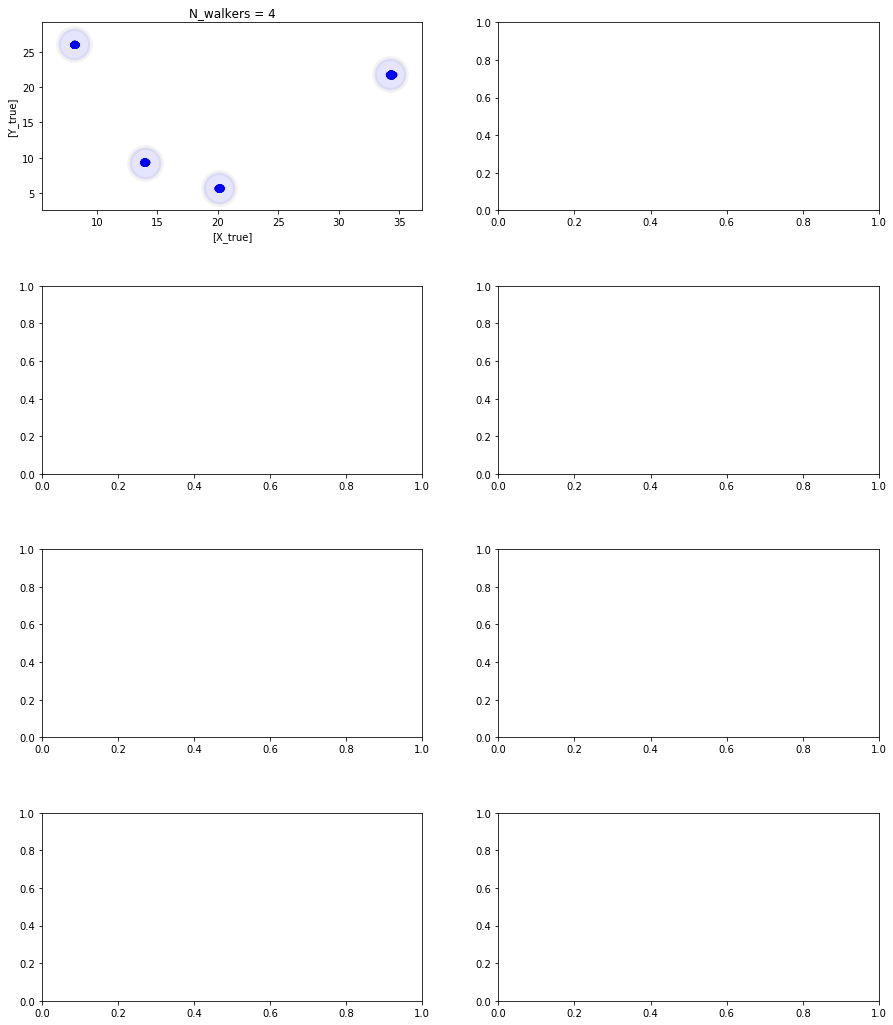

In [0]:
fig, axes = plt.subplots(nrows=4, ncols=2)

fig.subplots_adjust(hspace=0.4)

# #-------------- N = 2--------------------------------

new_data5.plot.scatter(figsize=(15,18),x=['X_0','X_1','X_2','X_3'],
                       y=['Y_0','Y_1','Y_2','Y_3'],c='blue',ax=axes[0,0])
T_sources.plot.scatter(figsize=(15,18),x=['X_true'],
                       y=['Y_true'],c='blue',ax=axes[0,0],s=1000,alpha=0.1,edgecolors="grey",
                       linewidth=5, title = 'N_walkers = 4')